In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
#loading training and testing data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

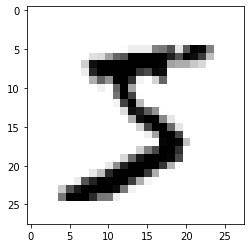

In [7]:
plt.imshow(x_train[0],cmap='binary')
plt.show()


In [9]:

print(set(y_train)) # for unique values

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [10]:
y_train[0]

5

In [11]:
#using one hot encoder
from tensorflow.keras.utils import to_categorical

In [14]:
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)
print(y_train_encoded)
print("next")
print(y_train_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
next
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [15]:
#validated shapes
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(60000, 10)
(10000, 10)


In [16]:
y_train_encoded[0] #dispay encoded levels

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
#preprocessing
import numpy as np
x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)


(60000, 784)
(10000, 784)


In [18]:
#display pixel values
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [19]:
x_train_reshaped[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [20]:
#data normalization
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_test_reshaped)
epsilon=1e-10
x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)
print(set(x_train_norm[0]))

{-0.4208334576662378, 1.170628963378821, 1.2969355047316034, 1.789531016007455, 1.6758551287899506, 2.7999833468297144, 2.6989381137474884, 1.183259617514099, 1.5242872791666118, 2.7747220385591578, 2.421063722771367, 2.5852622265299843, 1.6000712039782812, 0.02123943706850074, 1.4737646626254988, 1.221151579919934, 0.14754597842128317, 0.6022495272913, 2.0800360611188546, 1.334827467137438, -0.11769775841955994, 2.1937119483363587, 0.5896188731560217, 1.0822143844318732, 1.9410988656307937, 1.4485033543549422, -0.38294149526040305, 0.4127897152621263, 0.4633123318032393, 0.2738525197740656, 2.4336943769066455, -0.07980579601372521, 0.9432771889438125, 1.9284682114955156, -0.21874299150178592, 2.168450640065802, 2.6610461513416537, 0.19806859496239615, 1.5495485874371682, -0.041913833607890486, 0.9306465348085342, 0.5643575648854653, 2.04214409871302, 0.6148801814265782, -0.13032841255483818, 0.7538173769146389, 0.7159254145088042, -0.3955721493956813, -0.3071575704487336, -0.092436450

In [21]:
x_train_norm[0]

array([-0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42083346,
       -0.42083346, -0.42083346, -0.42083346, -0.42083346, -0.42

In [25]:
#create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model=Sequential(
         [Dense(128,activation='relu',input_shape=(784,)),
          Dense(128,activation='relu'),
          Dense(10,activation='softmax')
         ])

In [34]:
#compiling the model
model.compile(
              optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train_norm,y_train_encoded,epochs=3)
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print(accuracy*100)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 16s 261us/sample - loss: 0.3584 - accuracy: 0.8943
Epoch 2/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1802 - accuracy: 0.9476
Epoch 3/3
10000/10000 [==============================] - 1s 95us/sample - loss: 0.1324 - accuracy: 0.9597
95.96999883651733


In [36]:
#predication
preds=model.predict(x_test_norm)
print(preds.shape)



(10000, 10)


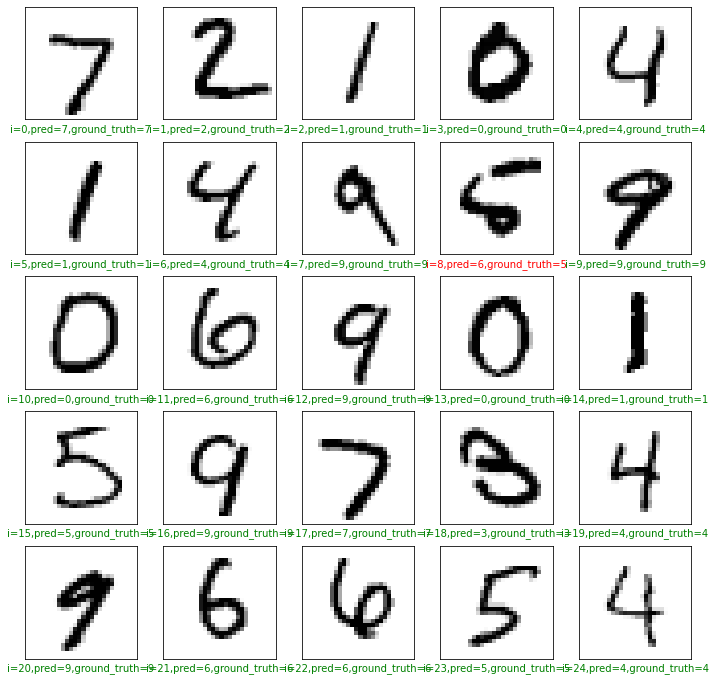

In [49]:
#plotting the result
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid('false')
    plt.xticks([])
    plt.yticks([])
    pred=np.argmax(preds[start_index+i])
    ground_truth=y_test[start_index+i]
    col='g'
    if pred!=ground_truth:
        col='r'
    plt.xlabel('i={},pred={},ground_truth={}'.format(start_index+i,pred,ground_truth),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()
